In [1]:
import os
import pandas as  pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from src.dataset import prep_dataloader
from src.model import AENet
from src.training import train, test, get_log_name
from src.evaluation import create_loss_label_df, cal_threshold, predict, show_confusion_matrix

In [2]:
# config
# path
tr_path = '../../data/anomaly_detection/training-set.csv'
val_path = '../../data/anomaly_detection/validation-set.csv'
tt_path = '../../data/anomaly_detection/testing-set.csv'
log_path = '../../logs/anomaly_detection'
model_path = '../../models/anomaly_detection/AE_model_weights.pth'

# hyperparameter
epochs = 1000
batch_size = 64
lr = 1e-3

In [3]:
# prepare dataloader
normal_tr_dl = prep_dataloader(
    tr_path,
    batch_size,
    shuffle=True,
    mode='normal'
)

normal_val_dl = prep_dataloader(
    val_path,
    batch_size,
    shuffle=False,
    mode='normal'
)

normal_tt_dl = prep_dataloader(
    tt_path,
    batch_size,
    shuffle=False,
    mode='normal'
)

all_tr_dl = prep_dataloader(
    tr_path,
    batch_size,
    shuffle=False,
    mode='all'
)

all_val_dl = prep_dataloader(
    val_path,
    batch_size,
    shuffle=False,
    mode='all'
)

all_tt_dl = prep_dataloader(
    tt_path,
    batch_size,
    shuffle=False,
    mode='all'
)

Finished reading the training set (normal) of Dataset (59584 samples found, each dim = 196)
Finished reading the validation set (normal) of Dataset (14753 samples found, each dim = 196)
Finished reading the testing set (normal) of Dataset (18663 samples found, each dim = 196)
Finished reading the training set (all) of Dataset (164910 samples found, each dim = 196)
Finished reading the validation set (all) of Dataset (41228 samples found, each dim = 196)
Finished reading the testing set (all) of Dataset (51535 samples found, each dim = 196)


In [4]:
# training and validation
# device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# neural network
model = AENet().to(device)

# loss func and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

# load model weight
if os.path.isfile(model_path):
    print(f'Load model weights form {model_path}')
    model.load_state_dict(torch.load(model_path))

# summary writer
last_log_path = os.path.join(
    log_path, get_log_name(model, loss_fn, optimizer, epochs, batch_size, lr)
)
writer = SummaryWriter(last_log_path)

# training and validation
min_loss = 1000
for t in range(epochs):
    ep = t + 1
    print(f"Epoch {ep}")
    tr_loss = train(normal_tr_dl, model, loss_fn, optimizer, device)
    val_loss = test(normal_val_dl, model, loss_fn, device)
    
    # log loss and acc
    writer.add_scalar('Loss/train', tr_loss, ep)
    writer.add_scalar('Loss/val', val_loss, ep)
    
    # save best model by min val loss
    if val_loss < min_loss:
        print(f'Saving model to {model_path}\n')
        torch.save(model.state_dict(), model_path)
        min_loss = val_loss

print("Done!")

Using cuda device
Epoch 1


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.043175 

[Test] Avg loss: 0.011094 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 2


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.008538 

[Test] Avg loss: 0.006317 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 3


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.005511 

[Test] Avg loss: 0.004383 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 4


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.004178 

[Test] Avg loss: 0.003520 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 5


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.003521 

[Test] Avg loss: 0.003741 

Epoch 6


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.003255 

[Test] Avg loss: 0.003039 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 7


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.003057 

[Test] Avg loss: 0.002678 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 8


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002787 

[Test] Avg loss: 0.002449 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 9


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002587 

[Test] Avg loss: 0.002291 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 10


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002387 

[Test] Avg loss: 0.002200 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 11


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002594 

[Test] Avg loss: 0.001963 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 12


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002104 

[Test] Avg loss: 0.002520 

Epoch 13


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002051 

[Test] Avg loss: 0.003181 

Epoch 14


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002053 

[Test] Avg loss: 0.002951 

Epoch 15


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001878 

[Test] Avg loss: 0.001709 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 16


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001767 

[Test] Avg loss: 0.001639 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 17


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001686 

[Test] Avg loss: 0.001615 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 18


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001719 

[Test] Avg loss: 0.001377 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 19


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001536 

[Test] Avg loss: 0.001695 

Epoch 20


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001567 

[Test] Avg loss: 0.001292 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 21


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001503 

[Test] Avg loss: 0.001289 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 22


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001439 

[Test] Avg loss: 0.001318 

Epoch 23


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001483 

[Test] Avg loss: 0.001167 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 24


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001171 

[Test] Avg loss: 0.000991 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 25


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001400 

[Test] Avg loss: 0.001239 

Epoch 26


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001097 

[Test] Avg loss: 0.000985 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 27


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001109 

[Test] Avg loss: 0.000943 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 28


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001109 

[Test] Avg loss: 0.000909 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 29


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001070 

[Test] Avg loss: 0.000842 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 30


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001049 

[Test] Avg loss: 0.001430 

Epoch 31


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000958 

[Test] Avg loss: 0.000746 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 32


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000879 

[Test] Avg loss: 0.000741 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 33


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000860 

[Test] Avg loss: 0.000725 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 34


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000839 

[Test] Avg loss: 0.000810 

Epoch 35


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000810 

[Test] Avg loss: 0.000979 

Epoch 36


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000895 

[Test] Avg loss: 0.000633 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 37


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000828 

[Test] Avg loss: 0.001152 

Epoch 38


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000734 

[Test] Avg loss: 0.000647 

Epoch 39


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000752 

[Test] Avg loss: 0.000601 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 40


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000765 

[Test] Avg loss: 0.000765 

Epoch 41


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000680 

[Test] Avg loss: 0.000625 

Epoch 42


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000732 

[Test] Avg loss: 0.000635 

Epoch 43


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000668 

[Test] Avg loss: 0.000929 

Epoch 44


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000709 

[Test] Avg loss: 0.000541 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 45


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000672 

[Test] Avg loss: 0.000564 

Epoch 46


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000725 

[Test] Avg loss: 0.000469 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 47


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000593 

[Test] Avg loss: 0.000503 

Epoch 48


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000633 

[Test] Avg loss: 0.000595 

Epoch 49


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000691 

[Test] Avg loss: 0.000448 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 50


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000610 

[Test] Avg loss: 0.000473 

Epoch 51


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000573 

[Test] Avg loss: 0.000813 

Epoch 52


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000618 

[Test] Avg loss: 0.000706 

Epoch 53


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000593 

[Test] Avg loss: 0.000527 

Epoch 54


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000556 

[Test] Avg loss: 0.000451 

Epoch 55


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000575 

[Test] Avg loss: 0.000441 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 56


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000524 

[Test] Avg loss: 0.000956 

Epoch 57


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000540 

[Test] Avg loss: 0.000384 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 58


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000787 

[Test] Avg loss: 0.000946 

Epoch 59


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000542 

[Test] Avg loss: 0.000527 

Epoch 60


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000509 

[Test] Avg loss: 0.000415 

Epoch 61


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000511 

[Test] Avg loss: 0.000862 

Epoch 62


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000521 

[Test] Avg loss: 0.000427 

Epoch 63


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000584 

[Test] Avg loss: 0.000457 

Epoch 64


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000518 

[Test] Avg loss: 0.000615 

Epoch 65


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000539 

[Test] Avg loss: 0.000525 

Epoch 66


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000505 

[Test] Avg loss: 0.000416 

Epoch 67


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000596 

[Test] Avg loss: 0.003339 

Epoch 68


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000548 

[Test] Avg loss: 0.000406 

Epoch 69


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000447 

[Test] Avg loss: 0.000517 

Epoch 70


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000479 

[Test] Avg loss: 0.000496 

Epoch 71


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000469 

[Test] Avg loss: 0.000824 

Epoch 72


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000506 

[Test] Avg loss: 0.000369 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 73


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000476 

[Test] Avg loss: 0.000285 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 74


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000437 

[Test] Avg loss: 0.000344 

Epoch 75


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000472 

[Test] Avg loss: 0.000414 

Epoch 76


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000458 

[Test] Avg loss: 0.000304 

Epoch 77


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000426 

[Test] Avg loss: 0.000436 

Epoch 78


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000483 

[Test] Avg loss: 0.000356 

Epoch 79


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000443 

[Test] Avg loss: 0.000298 

Epoch 80


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000511 

[Test] Avg loss: 0.000374 

Epoch 81


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000404 

[Test] Avg loss: 0.000363 

Epoch 82


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000434 

[Test] Avg loss: 0.000784 

Epoch 83


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000412 

[Test] Avg loss: 0.000343 

Epoch 84


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000433 

[Test] Avg loss: 0.000356 

Epoch 85


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000498 

[Test] Avg loss: 0.000482 

Epoch 86


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000422 

[Test] Avg loss: 0.000318 

Epoch 87


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000424 

[Test] Avg loss: 0.000300 

Epoch 88


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000409 

[Test] Avg loss: 0.000374 

Epoch 89


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000543 

[Test] Avg loss: 0.000262 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 90


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000401 

[Test] Avg loss: 0.000946 

Epoch 91


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000478 

[Test] Avg loss: 0.000312 

Epoch 92


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000375 

[Test] Avg loss: 0.000359 

Epoch 93


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000428 

[Test] Avg loss: 0.000363 

Epoch 94


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000434 

[Test] Avg loss: 0.000398 

Epoch 95


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000403 

[Test] Avg loss: 0.000391 

Epoch 96


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000450 

[Test] Avg loss: 0.000406 

Epoch 97


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000384 

[Test] Avg loss: 0.000237 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 98


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000373 

[Test] Avg loss: 0.000384 

Epoch 99


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000424 

[Test] Avg loss: 0.000304 

Epoch 100


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000374 

[Test] Avg loss: 0.000733 

Epoch 101


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000383 

[Test] Avg loss: 0.000371 

Epoch 102


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000610 

[Test] Avg loss: 0.000439 

Epoch 103


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000356 

[Test] Avg loss: 0.000289 

Epoch 104


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000363 

[Test] Avg loss: 0.000328 

Epoch 105


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000403 

[Test] Avg loss: 0.000306 

Epoch 106


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000374 

[Test] Avg loss: 0.000292 

Epoch 107


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000431 

[Test] Avg loss: 0.000386 

Epoch 108


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000356 

[Test] Avg loss: 0.000322 

Epoch 109


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000349 

[Test] Avg loss: 0.001751 

Epoch 110


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000472 

[Test] Avg loss: 0.000317 

Epoch 111


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000321 

[Test] Avg loss: 0.001093 

Epoch 112


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000431 

[Test] Avg loss: 0.000278 

Epoch 113


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000444 

[Test] Avg loss: 0.000255 

Epoch 114


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000309 

[Test] Avg loss: 0.000298 

Epoch 115


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000375 

[Test] Avg loss: 0.000277 

Epoch 116


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000336 

[Test] Avg loss: 0.000618 

Epoch 117


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000468 

[Test] Avg loss: 0.000240 

Epoch 118


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000320 

[Test] Avg loss: 0.000405 

Epoch 119


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000344 

[Test] Avg loss: 0.000843 

Epoch 120


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000409 

[Test] Avg loss: 0.000374 

Epoch 121


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000356 

[Test] Avg loss: 0.000506 

Epoch 122


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000349 

[Test] Avg loss: 0.000276 

Epoch 123


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000330 

[Test] Avg loss: 0.000388 

Epoch 124


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000315 

[Test] Avg loss: 0.000302 

Epoch 125


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000445 

[Test] Avg loss: 0.000252 

Epoch 126


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000312 

[Test] Avg loss: 0.000426 

Epoch 127


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000410 

[Test] Avg loss: 0.000206 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 128


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000350 

[Test] Avg loss: 0.000468 

Epoch 129


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000349 

[Test] Avg loss: 0.000245 

Epoch 130


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000371 

[Test] Avg loss: 0.000241 

Epoch 131


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000310 

[Test] Avg loss: 0.000231 

Epoch 132


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000340 

[Test] Avg loss: 0.000355 

Epoch 133


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000471 

[Test] Avg loss: 0.000240 

Epoch 134


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000322 

[Test] Avg loss: 0.000346 

Epoch 135


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000310 

[Test] Avg loss: 0.000401 

Epoch 136


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000345 

[Test] Avg loss: 0.000263 

Epoch 137


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000463 

[Test] Avg loss: 0.000222 

Epoch 138


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000345 

[Test] Avg loss: 0.000273 

Epoch 139


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000309 

[Test] Avg loss: 0.000287 

Epoch 140


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000329 

[Test] Avg loss: 0.000274 

Epoch 141


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000374 

[Test] Avg loss: 0.000311 

Epoch 142


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000355 

[Test] Avg loss: 0.000214 

Epoch 143


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000275 

[Test] Avg loss: 0.000228 

Epoch 144


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000322 

[Test] Avg loss: 0.000711 

Epoch 145


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000470 

[Test] Avg loss: 0.000452 

Epoch 146


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000309 

[Test] Avg loss: 0.000269 

Epoch 147


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000353 

[Test] Avg loss: 0.000236 

Epoch 148


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000297 

[Test] Avg loss: 0.000190 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 149


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000307 

[Test] Avg loss: 0.000568 

Epoch 150


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000438 

[Test] Avg loss: 0.000245 

Epoch 151


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000306 

[Test] Avg loss: 0.000273 

Epoch 152


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000359 

[Test] Avg loss: 0.000405 

Epoch 153


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000269 

[Test] Avg loss: 0.000271 

Epoch 154


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000314 

[Test] Avg loss: 0.000209 

Epoch 155


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000331 

[Test] Avg loss: 0.000342 

Epoch 156


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000382 

[Test] Avg loss: 0.001037 

Epoch 157


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000307 

[Test] Avg loss: 0.000200 

Epoch 158


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000285 

[Test] Avg loss: 0.000241 

Epoch 159


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000334 

[Test] Avg loss: 0.000506 

Epoch 160


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000271 

[Test] Avg loss: 0.000400 

Epoch 161


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000333 

[Test] Avg loss: 0.000746 

Epoch 162


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000387 

[Test] Avg loss: 0.000241 

Epoch 163


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000296 

[Test] Avg loss: 0.000399 

Epoch 164


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000306 

[Test] Avg loss: 0.000342 

Epoch 165


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000302 

[Test] Avg loss: 0.000402 

Epoch 166


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000317 

[Test] Avg loss: 0.000305 

Epoch 167


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000327 

[Test] Avg loss: 0.000474 

Epoch 168


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000297 

[Test] Avg loss: 0.000267 

Epoch 169


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000286 

[Test] Avg loss: 0.000207 

Epoch 170


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000286 

[Test] Avg loss: 0.000295 

Epoch 171


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000316 

[Test] Avg loss: 0.000286 

Epoch 172


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000296 

[Test] Avg loss: 0.000215 

Epoch 173


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000327 

[Test] Avg loss: 0.000295 

Epoch 174


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000311 

[Test] Avg loss: 0.000206 

Epoch 175


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000312 

[Test] Avg loss: 0.000197 

Epoch 176


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000367 

[Test] Avg loss: 0.000217 

Epoch 177


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000257 

[Test] Avg loss: 0.000190 

Epoch 178


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000318 

[Test] Avg loss: 0.000959 

Epoch 179


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000317 

[Test] Avg loss: 0.000297 

Epoch 180


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000285 

[Test] Avg loss: 0.000210 

Epoch 181


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000396 

[Test] Avg loss: 0.000256 

Epoch 182


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000280 

[Test] Avg loss: 0.000408 

Epoch 183


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000309 

[Test] Avg loss: 0.000336 

Epoch 184


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000289 

[Test] Avg loss: 0.000188 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 185


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000278 

[Test] Avg loss: 0.000423 

Epoch 186


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000332 

[Test] Avg loss: 0.000299 

Epoch 187


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000315 

[Test] Avg loss: 0.000415 

Epoch 188


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000284 

[Test] Avg loss: 0.000339 

Epoch 189


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000271 

[Test] Avg loss: 0.000240 

Epoch 190


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000277 

[Test] Avg loss: 0.000219 

Epoch 191


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000287 

[Test] Avg loss: 0.000267 

Epoch 192


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000324 

[Test] Avg loss: 0.000313 

Epoch 193


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000276 

[Test] Avg loss: 0.000221 

Epoch 194


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000290 

[Test] Avg loss: 0.000184 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 195


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000242 

[Test] Avg loss: 0.000488 

Epoch 196


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000330 

[Test] Avg loss: 0.000234 

Epoch 197


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000261 

[Test] Avg loss: 0.000213 

Epoch 198


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000308 

[Test] Avg loss: 0.000230 

Epoch 199


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000277 

[Test] Avg loss: 0.000239 

Epoch 200


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000388 

[Test] Avg loss: 0.000344 

Epoch 201


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000326 

[Test] Avg loss: 0.000175 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 202


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000312 

[Test] Avg loss: 0.000343 

Epoch 203


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000352 

[Test] Avg loss: 0.000223 

Epoch 204


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000245 

[Test] Avg loss: 0.000227 

Epoch 205


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000287 

[Test] Avg loss: 0.000167 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 206


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000286 

[Test] Avg loss: 0.000267 

Epoch 207


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000344 

[Test] Avg loss: 0.000226 

Epoch 208


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000268 

[Test] Avg loss: 0.000383 

Epoch 209


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000305 

[Test] Avg loss: 0.000413 

Epoch 210


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000264 

[Test] Avg loss: 0.000178 

Epoch 211


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000251 

[Test] Avg loss: 0.000518 

Epoch 212


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000338 

[Test] Avg loss: 0.000199 

Epoch 213


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000295 

[Test] Avg loss: 0.000194 

Epoch 214


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000256 

[Test] Avg loss: 0.000191 

Epoch 215


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000336 

[Test] Avg loss: 0.000174 

Epoch 216


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000316 

[Test] Avg loss: 0.000426 

Epoch 217


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000287 

[Test] Avg loss: 0.000176 

Epoch 218


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000262 

[Test] Avg loss: 0.000388 

Epoch 219


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000261 

[Test] Avg loss: 0.000231 

Epoch 220


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000279 

[Test] Avg loss: 0.000191 

Epoch 221


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000295 

[Test] Avg loss: 0.000309 

Epoch 222


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000263 

[Test] Avg loss: 0.000206 

Epoch 223


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000272 

[Test] Avg loss: 0.000721 

Epoch 224


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000287 

[Test] Avg loss: 0.000292 

Epoch 225


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000267 

[Test] Avg loss: 0.000182 

Epoch 226


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000311 

[Test] Avg loss: 0.000317 

Epoch 227


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000273 

[Test] Avg loss: 0.000272 

Epoch 228


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000282 

[Test] Avg loss: 0.000198 

Epoch 229


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000268 

[Test] Avg loss: 0.000282 

Epoch 230


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000307 

[Test] Avg loss: 0.000178 

Epoch 231


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000271 

[Test] Avg loss: 0.000228 

Epoch 232


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000295 

[Test] Avg loss: 0.000241 

Epoch 233


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000272 

[Test] Avg loss: 0.000205 

Epoch 234


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000282 

[Test] Avg loss: 0.000207 

Epoch 235


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000268 

[Test] Avg loss: 0.000200 

Epoch 236


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000364 

[Test] Avg loss: 0.000197 

Epoch 237


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000259 

[Test] Avg loss: 0.000236 

Epoch 238


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000296 

[Test] Avg loss: 0.000229 

Epoch 239


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000255 

[Test] Avg loss: 0.000269 

Epoch 240


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000276 

[Test] Avg loss: 0.000176 

Epoch 241


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000266 

[Test] Avg loss: 0.000273 

Epoch 242


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000348 

[Test] Avg loss: 0.000174 

Epoch 243


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000246 

[Test] Avg loss: 0.000571 

Epoch 244


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000326 

[Test] Avg loss: 0.000203 

Epoch 245


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000246 

[Test] Avg loss: 0.000264 

Epoch 246


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000272 

[Test] Avg loss: 0.000223 

Epoch 247


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000335 

[Test] Avg loss: 0.000237 

Epoch 248


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000260 

[Test] Avg loss: 0.000200 

Epoch 249


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000227 

[Test] Avg loss: 0.000225 

Epoch 250


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000394 

[Test] Avg loss: 0.000253 

Epoch 251


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000236 

[Test] Avg loss: 0.000172 

Epoch 252


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000251 

[Test] Avg loss: 0.000199 

Epoch 253


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000274 

[Test] Avg loss: 0.000204 

Epoch 254


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000264 

[Test] Avg loss: 0.000243 

Epoch 255


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000259 

[Test] Avg loss: 0.000757 

Epoch 256


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000308 

[Test] Avg loss: 0.000311 

Epoch 257


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000259 

[Test] Avg loss: 0.000336 

Epoch 258


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000327 

[Test] Avg loss: 0.000228 

Epoch 259


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000217 

[Test] Avg loss: 0.000326 

Epoch 260


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000264 

[Test] Avg loss: 0.000207 

Epoch 261


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000287 

[Test] Avg loss: 0.000215 

Epoch 262


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000265 

[Test] Avg loss: 0.000212 

Epoch 263


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000249 

[Test] Avg loss: 0.000174 

Epoch 264


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000262 

[Test] Avg loss: 0.000262 

Epoch 265


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000261 

[Test] Avg loss: 0.000174 

Epoch 266


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000263 

[Test] Avg loss: 0.000251 

Epoch 267


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000295 

[Test] Avg loss: 0.000189 

Epoch 268


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000308 

[Test] Avg loss: 0.000201 

Epoch 269


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000236 

[Test] Avg loss: 0.000182 

Epoch 270


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000260 

[Test] Avg loss: 0.000205 

Epoch 271


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000248 

[Test] Avg loss: 0.000508 

Epoch 272


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000333 

[Test] Avg loss: 0.001018 

Epoch 273


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000307 

[Test] Avg loss: 0.000190 

Epoch 274


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000240 

[Test] Avg loss: 0.000194 

Epoch 275


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000241 

[Test] Avg loss: 0.000185 

Epoch 276


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000268 

[Test] Avg loss: 0.000309 

Epoch 277


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000294 

[Test] Avg loss: 0.000257 

Epoch 278


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000275 

[Test] Avg loss: 0.000159 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 279


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000213 

[Test] Avg loss: 0.000251 

Epoch 280


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000249 

[Test] Avg loss: 0.000157 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 281


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000251 

[Test] Avg loss: 0.000460 

Epoch 282


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000295 

[Test] Avg loss: 0.000188 

Epoch 283


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000278 

[Test] Avg loss: 0.000161 

Epoch 284


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000250 

[Test] Avg loss: 0.000232 

Epoch 285


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000238 

[Test] Avg loss: 0.000219 

Epoch 286


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000253 

[Test] Avg loss: 0.000170 

Epoch 287


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000269 

[Test] Avg loss: 0.000205 

Epoch 288


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000262 

[Test] Avg loss: 0.000386 

Epoch 289


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000272 

[Test] Avg loss: 0.000183 

Epoch 290


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000229 

[Test] Avg loss: 0.000165 

Epoch 291


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000273 

[Test] Avg loss: 0.000160 

Epoch 292


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000261 

[Test] Avg loss: 0.000288 

Epoch 293


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000248 

[Test] Avg loss: 0.000163 

Epoch 294


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000289 

[Test] Avg loss: 0.000153 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 295


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000267 

[Test] Avg loss: 0.000158 

Epoch 296


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000239 

[Test] Avg loss: 0.000370 

Epoch 297


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000267 

[Test] Avg loss: 0.000200 

Epoch 298


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000217 

[Test] Avg loss: 0.000166 

Epoch 299


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000319 

[Test] Avg loss: 0.000166 

Epoch 300


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000281 

[Test] Avg loss: 0.000247 

Epoch 301


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000229 

[Test] Avg loss: 0.000357 

Epoch 302


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000277 

[Test] Avg loss: 0.000697 

Epoch 303


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000245 

[Test] Avg loss: 0.000281 

Epoch 304


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000334 

[Test] Avg loss: 0.000194 

Epoch 305


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000289 

[Test] Avg loss: 0.000177 

Epoch 306


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000235 

[Test] Avg loss: 0.000273 

Epoch 307


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000244 

[Test] Avg loss: 0.000315 

Epoch 308


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000243 

[Test] Avg loss: 0.000253 

Epoch 309


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000266 

[Test] Avg loss: 0.000164 

Epoch 310


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000245 

[Test] Avg loss: 0.000260 

Epoch 311


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000281 

[Test] Avg loss: 0.000192 

Epoch 312


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000213 

[Test] Avg loss: 0.000306 

Epoch 313


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000235 

[Test] Avg loss: 0.000156 

Epoch 314


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000331 

[Test] Avg loss: 0.000209 

Epoch 315


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000253 

[Test] Avg loss: 0.000448 

Epoch 316


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000229 

[Test] Avg loss: 0.000249 

Epoch 317


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000233 

[Test] Avg loss: 0.000151 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 318


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000239 

[Test] Avg loss: 0.000175 

Epoch 319


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000212 

[Test] Avg loss: 0.000174 

Epoch 320


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000282 

[Test] Avg loss: 0.000296 

Epoch 321


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000283 

[Test] Avg loss: 0.000177 

Epoch 322


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000212 

Epoch 323


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000265 

[Test] Avg loss: 0.000306 

Epoch 324


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000238 

[Test] Avg loss: 0.000147 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 325


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000275 

[Test] Avg loss: 0.000322 

Epoch 326


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000217 

[Test] Avg loss: 0.000238 

Epoch 327


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000238 

[Test] Avg loss: 0.000169 

Epoch 328


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000232 

[Test] Avg loss: 0.000184 

Epoch 329


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000282 

[Test] Avg loss: 0.000190 

Epoch 330


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000229 

[Test] Avg loss: 0.000187 

Epoch 331


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000351 

[Test] Avg loss: 0.000200 

Epoch 332


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000210 

[Test] Avg loss: 0.000239 

Epoch 333


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000242 

[Test] Avg loss: 0.000182 

Epoch 334


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000223 

[Test] Avg loss: 0.000206 

Epoch 335


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000217 

[Test] Avg loss: 0.000312 

Epoch 336


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000262 

[Test] Avg loss: 0.000340 

Epoch 337


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000269 

[Test] Avg loss: 0.000561 

Epoch 338


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000218 

[Test] Avg loss: 0.000321 

Epoch 339


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000241 

[Test] Avg loss: 0.000166 

Epoch 340


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000297 

[Test] Avg loss: 0.000179 

Epoch 341


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000233 

[Test] Avg loss: 0.000143 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 342


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000225 

[Test] Avg loss: 0.000427 

Epoch 343


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000262 

[Test] Avg loss: 0.000160 

Epoch 344


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000214 

[Test] Avg loss: 0.000287 

Epoch 345


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000248 

[Test] Avg loss: 0.000184 

Epoch 346


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000318 

[Test] Avg loss: 0.000242 

Epoch 347


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000255 

[Test] Avg loss: 0.000156 

Epoch 348


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000209 

[Test] Avg loss: 0.000157 

Epoch 349


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000227 

[Test] Avg loss: 0.000234 

Epoch 350


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000235 

[Test] Avg loss: 0.000373 

Epoch 351


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000238 

[Test] Avg loss: 0.000165 

Epoch 352


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000265 

[Test] Avg loss: 0.000272 

Epoch 353


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000247 

[Test] Avg loss: 0.000438 

Epoch 354


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000305 

Epoch 355


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000230 

[Test] Avg loss: 0.000175 

Epoch 356


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000240 

[Test] Avg loss: 0.000193 

Epoch 357


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000219 

[Test] Avg loss: 0.000235 

Epoch 358


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000228 

[Test] Avg loss: 0.000162 

Epoch 359


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000249 

[Test] Avg loss: 0.000231 

Epoch 360


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000240 

[Test] Avg loss: 0.000331 

Epoch 361


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000262 

[Test] Avg loss: 0.000168 

Epoch 362


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000259 

[Test] Avg loss: 0.000166 

Epoch 363


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000262 

[Test] Avg loss: 0.000162 

Epoch 364


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000167 

Epoch 365


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000292 

[Test] Avg loss: 0.000214 

Epoch 366


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000145 

Epoch 367


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000226 

[Test] Avg loss: 0.000195 

Epoch 368


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000256 

[Test] Avg loss: 0.000155 

Epoch 369


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000173 

Epoch 370


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000258 

[Test] Avg loss: 0.000179 

Epoch 371


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000234 

[Test] Avg loss: 0.000148 

Epoch 372


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000351 

Epoch 373


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000211 

[Test] Avg loss: 0.000197 

Epoch 374


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000264 

[Test] Avg loss: 0.000631 

Epoch 375


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000243 

[Test] Avg loss: 0.000172 

Epoch 376


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000217 

[Test] Avg loss: 0.000325 

Epoch 377


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000225 

[Test] Avg loss: 0.000192 

Epoch 378


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000253 

[Test] Avg loss: 0.000220 

Epoch 379


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000236 

[Test] Avg loss: 0.000263 

Epoch 380


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000230 

Epoch 381


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000228 

[Test] Avg loss: 0.000156 

Epoch 382


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000160 

Epoch 383


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000240 

[Test] Avg loss: 0.000218 

Epoch 384


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000233 

[Test] Avg loss: 0.000211 

Epoch 385


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000252 

[Test] Avg loss: 0.000158 

Epoch 386


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000238 

[Test] Avg loss: 0.000197 

Epoch 387


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000278 

Epoch 388


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000163 

Epoch 389


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000284 

[Test] Avg loss: 0.000333 

Epoch 390


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000198 

[Test] Avg loss: 0.000161 

Epoch 391


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000239 

[Test] Avg loss: 0.000170 

Epoch 392


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000204 

[Test] Avg loss: 0.000149 

Epoch 393


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000228 

[Test] Avg loss: 0.000188 

Epoch 394


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000236 

[Test] Avg loss: 0.000190 

Epoch 395


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000258 

[Test] Avg loss: 0.000161 

Epoch 396


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000242 

[Test] Avg loss: 0.000165 

Epoch 397


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000213 

[Test] Avg loss: 0.000199 

Epoch 398


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000280 

[Test] Avg loss: 0.000213 

Epoch 399


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000263 

[Test] Avg loss: 0.000160 

Epoch 400


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000211 

[Test] Avg loss: 0.000277 

Epoch 401


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000227 

[Test] Avg loss: 0.000350 

Epoch 402


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000227 

[Test] Avg loss: 0.000225 

Epoch 403


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000236 

[Test] Avg loss: 0.000152 

Epoch 404


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000201 

[Test] Avg loss: 0.000195 

Epoch 405


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000277 

[Test] Avg loss: 0.000173 

Epoch 406


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000242 

[Test] Avg loss: 0.000212 

Epoch 407


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000232 

[Test] Avg loss: 0.000350 

Epoch 408


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000218 

[Test] Avg loss: 0.000182 

Epoch 409


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000228 

[Test] Avg loss: 0.000196 

Epoch 410


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000289 

[Test] Avg loss: 0.000282 

Epoch 411


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000230 

[Test] Avg loss: 0.000242 

Epoch 412


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000258 

[Test] Avg loss: 0.000194 

Epoch 413


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000214 

[Test] Avg loss: 0.000164 

Epoch 414


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000223 

[Test] Avg loss: 0.000192 

Epoch 415


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000263 

[Test] Avg loss: 0.000909 

Epoch 416


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000219 

[Test] Avg loss: 0.000154 

Epoch 417


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000216 

[Test] Avg loss: 0.000237 

Epoch 418


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000209 

[Test] Avg loss: 0.000158 

Epoch 419


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000243 

[Test] Avg loss: 0.000172 

Epoch 420


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000225 

[Test] Avg loss: 0.000162 

Epoch 421


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000190 

Epoch 422


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000253 

[Test] Avg loss: 0.000235 

Epoch 423


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000250 

[Test] Avg loss: 0.000173 

Epoch 424


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000315 

Epoch 425


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000306 

[Test] Avg loss: 0.000156 

Epoch 426


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000199 

[Test] Avg loss: 0.000191 

Epoch 427


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000239 

[Test] Avg loss: 0.000229 

Epoch 428


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000261 

[Test] Avg loss: 0.000401 

Epoch 429


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000199 

Epoch 430


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000215 

[Test] Avg loss: 0.000322 

Epoch 431


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000235 

[Test] Avg loss: 0.000187 

Epoch 432


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000207 

[Test] Avg loss: 0.000166 

Epoch 433


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000331 

Epoch 434


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000294 

[Test] Avg loss: 0.000169 

Epoch 435


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000236 

[Test] Avg loss: 0.000171 

Epoch 436


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000202 

[Test] Avg loss: 0.000152 

Epoch 437


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000188 

Epoch 438


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000249 

[Test] Avg loss: 0.000145 

Epoch 439


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000196 

Epoch 440


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000227 

[Test] Avg loss: 0.000149 

Epoch 441


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000242 

[Test] Avg loss: 0.000208 

Epoch 442


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000240 

[Test] Avg loss: 0.000166 

Epoch 443


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000254 

[Test] Avg loss: 0.000251 

Epoch 444


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000142 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 445


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000190 

[Test] Avg loss: 0.000212 

Epoch 446


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000233 

[Test] Avg loss: 0.000144 

Epoch 447


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000215 

[Test] Avg loss: 0.000145 

Epoch 448


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000216 

[Test] Avg loss: 0.000194 

Epoch 449


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000240 

[Test] Avg loss: 0.000162 

Epoch 450


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000285 

Epoch 451


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000273 

[Test] Avg loss: 0.000134 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 452


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000213 

[Test] Avg loss: 0.000354 

Epoch 453


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000168 

Epoch 454


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000235 

[Test] Avg loss: 0.000163 

Epoch 455


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000155 

Epoch 456


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000263 

[Test] Avg loss: 0.000201 

Epoch 457


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000214 

[Test] Avg loss: 0.000167 

Epoch 458


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000227 

[Test] Avg loss: 0.000252 

Epoch 459


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000221 

[Test] Avg loss: 0.000148 

Epoch 460


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000218 

[Test] Avg loss: 0.000948 

Epoch 461


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000243 

[Test] Avg loss: 0.000249 

Epoch 462


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000230 

Epoch 463


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000231 

[Test] Avg loss: 0.000474 

Epoch 464


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000267 

[Test] Avg loss: 0.000285 

Epoch 465


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000215 

[Test] Avg loss: 0.000179 

Epoch 466


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000249 

Epoch 467


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000229 

[Test] Avg loss: 0.000174 

Epoch 468


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000159 

Epoch 469


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000215 

[Test] Avg loss: 0.000192 

Epoch 470


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000250 

[Test] Avg loss: 0.000147 

Epoch 471


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000212 

[Test] Avg loss: 0.000241 

Epoch 472


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000204 

[Test] Avg loss: 0.000292 

Epoch 473


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000233 

[Test] Avg loss: 0.000169 

Epoch 474


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000163 

Epoch 475


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000210 

[Test] Avg loss: 0.000196 

Epoch 476


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000243 

[Test] Avg loss: 0.000324 

Epoch 477


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000199 

[Test] Avg loss: 0.000137 

Epoch 478


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000232 

[Test] Avg loss: 0.000150 

Epoch 479


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000245 

[Test] Avg loss: 0.000153 

Epoch 480


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000204 

[Test] Avg loss: 0.000316 

Epoch 481


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000207 

[Test] Avg loss: 0.000202 

Epoch 482


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000218 

[Test] Avg loss: 0.000186 

Epoch 483


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000193 

[Test] Avg loss: 0.000174 

Epoch 484


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000246 

[Test] Avg loss: 0.000201 

Epoch 485


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000184 

[Test] Avg loss: 0.000242 

Epoch 486


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000172 

Epoch 487


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000184 

Epoch 488


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000272 

[Test] Avg loss: 0.000142 

Epoch 489


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000195 

[Test] Avg loss: 0.000177 

Epoch 490


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000253 

[Test] Avg loss: 0.000154 

Epoch 491


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000242 

[Test] Avg loss: 0.000192 

Epoch 492


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000194 

[Test] Avg loss: 0.000231 

Epoch 493


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000131 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 494


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000241 

[Test] Avg loss: 0.000203 

Epoch 495


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000199 

[Test] Avg loss: 0.000162 

Epoch 496


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000209 

Epoch 497


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000244 

[Test] Avg loss: 0.000212 

Epoch 498


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000227 

[Test] Avg loss: 0.000349 

Epoch 499


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000232 

[Test] Avg loss: 0.000160 

Epoch 500


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000195 

[Test] Avg loss: 0.000159 

Epoch 501


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000193 

[Test] Avg loss: 0.000314 

Epoch 502


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000282 

Epoch 503


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000239 

[Test] Avg loss: 0.000367 

Epoch 504


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000225 

[Test] Avg loss: 0.000237 

Epoch 505


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000233 

[Test] Avg loss: 0.000181 

Epoch 506


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000209 

Epoch 507


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000339 

[Test] Avg loss: 0.000217 

Epoch 508


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000178 

[Test] Avg loss: 0.000138 

Epoch 509


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000194 

[Test] Avg loss: 0.000215 

Epoch 510


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000214 

[Test] Avg loss: 0.000294 

Epoch 511


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000216 

[Test] Avg loss: 0.000144 

Epoch 512


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000207 

[Test] Avg loss: 0.000197 

Epoch 513


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000175 

Epoch 514


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000210 

[Test] Avg loss: 0.000156 

Epoch 515


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000154 

Epoch 516


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000191 

Epoch 517


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000212 

Epoch 518


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000189 

[Test] Avg loss: 0.000174 

Epoch 519


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000225 

[Test] Avg loss: 0.000163 

Epoch 520


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000138 

Epoch 521


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000201 

[Test] Avg loss: 0.000318 

Epoch 522


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000213 

[Test] Avg loss: 0.000247 

Epoch 523


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000173 

Epoch 524


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000221 

[Test] Avg loss: 0.000195 

Epoch 525


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000227 

[Test] Avg loss: 0.000171 

Epoch 526


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000241 

[Test] Avg loss: 0.000448 

Epoch 527


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000195 

[Test] Avg loss: 0.000195 

Epoch 528


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000197 

[Test] Avg loss: 0.000317 

Epoch 529


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000231 

[Test] Avg loss: 0.000163 

Epoch 530


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000488 

Epoch 531


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000168 

Epoch 532


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000148 

Epoch 533


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000221 

[Test] Avg loss: 0.000336 

Epoch 534


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000246 

[Test] Avg loss: 0.000136 

Epoch 535


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000182 

[Test] Avg loss: 0.000222 

Epoch 536


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000253 

[Test] Avg loss: 0.000143 

Epoch 537


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000178 

[Test] Avg loss: 0.000196 

Epoch 538


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000217 

[Test] Avg loss: 0.000201 

Epoch 539


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000214 

[Test] Avg loss: 0.000213 

Epoch 540


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000212 

Epoch 541


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000210 

[Test] Avg loss: 0.000168 

Epoch 542


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000215 

[Test] Avg loss: 0.000141 

Epoch 543


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000171 

[Test] Avg loss: 0.000196 

Epoch 544


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000204 

[Test] Avg loss: 0.000204 

Epoch 545


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000195 

[Test] Avg loss: 0.000117 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 546


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000248 

[Test] Avg loss: 0.000138 

Epoch 547


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000192 

Epoch 548


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000268 

Epoch 549


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000207 

[Test] Avg loss: 0.000146 

Epoch 550


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000152 

Epoch 551


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000231 

[Test] Avg loss: 0.000821 

Epoch 552


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000203 

[Test] Avg loss: 0.000177 

Epoch 553


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000235 

[Test] Avg loss: 0.000200 

Epoch 554


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000163 

[Test] Avg loss: 0.000383 

Epoch 555


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000235 

[Test] Avg loss: 0.000182 

Epoch 556


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000175 

[Test] Avg loss: 0.000142 

Epoch 557


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000216 

Epoch 558


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000137 

Epoch 559


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000215 

[Test] Avg loss: 0.000146 

Epoch 560


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000158 

Epoch 561


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000239 

[Test] Avg loss: 0.000149 

Epoch 562


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000162 

Epoch 563


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000169 

[Test] Avg loss: 0.000250 

Epoch 564


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000240 

[Test] Avg loss: 0.000143 

Epoch 565


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000260 

[Test] Avg loss: 0.000141 

Epoch 566


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000199 

Epoch 567


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000203 

[Test] Avg loss: 0.000277 

Epoch 568


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000197 

[Test] Avg loss: 0.000170 

Epoch 569


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000191 

[Test] Avg loss: 0.000156 

Epoch 570


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000199 

[Test] Avg loss: 0.000509 

Epoch 571


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000124 

Epoch 572


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000235 

[Test] Avg loss: 0.000192 

Epoch 573


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000157 

Epoch 574


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000134 

Epoch 575


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000243 

[Test] Avg loss: 0.000141 

Epoch 576


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000121 

Epoch 577


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000201 

[Test] Avg loss: 0.000198 

Epoch 578


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000200 

[Test] Avg loss: 0.000153 

Epoch 579


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000237 

[Test] Avg loss: 0.000802 

Epoch 580


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000172 

Epoch 581


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000230 

[Test] Avg loss: 0.000255 

Epoch 582


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000215 

Epoch 583


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000201 

[Test] Avg loss: 0.000141 

Epoch 584


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000209 

[Test] Avg loss: 0.000141 

Epoch 585


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000213 

[Test] Avg loss: 0.000222 

Epoch 586


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000173 

[Test] Avg loss: 0.000260 

Epoch 587


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000197 

[Test] Avg loss: 0.000168 

Epoch 588


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000198 

[Test] Avg loss: 0.000147 

Epoch 589


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000240 

[Test] Avg loss: 0.000242 

Epoch 590


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000214 

[Test] Avg loss: 0.000142 

Epoch 591


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000202 

[Test] Avg loss: 0.000235 

Epoch 592


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000190 

[Test] Avg loss: 0.000127 

Epoch 593


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000198 

[Test] Avg loss: 0.000143 

Epoch 594


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000174 

[Test] Avg loss: 0.000143 

Epoch 595


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000221 

[Test] Avg loss: 0.000286 

Epoch 596


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000190 

[Test] Avg loss: 0.000162 

Epoch 597


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000203 

[Test] Avg loss: 0.000172 

Epoch 598


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000179 

[Test] Avg loss: 0.000174 

Epoch 599


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000146 

Epoch 600


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000211 

[Test] Avg loss: 0.000344 

Epoch 601


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000204 

[Test] Avg loss: 0.000162 

Epoch 602


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000179 

[Test] Avg loss: 0.000162 

Epoch 603


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000198 

[Test] Avg loss: 0.000169 

Epoch 604


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000216 

[Test] Avg loss: 0.000142 

Epoch 605


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000174 

[Test] Avg loss: 0.000162 

Epoch 606


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000454 

Epoch 607


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000232 

[Test] Avg loss: 0.000139 

Epoch 608


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000163 

[Test] Avg loss: 0.000146 

Epoch 609


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000221 

[Test] Avg loss: 0.000161 

Epoch 610


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000219 

[Test] Avg loss: 0.000402 

Epoch 611


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000209 

[Test] Avg loss: 0.000132 

Epoch 612


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000184 

[Test] Avg loss: 0.000306 

Epoch 613


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000168 

[Test] Avg loss: 0.000155 

Epoch 614


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000194 

[Test] Avg loss: 0.000134 

Epoch 615


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000198 

[Test] Avg loss: 0.000137 

Epoch 616


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000207 

[Test] Avg loss: 0.000168 

Epoch 617


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000238 

Epoch 618


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000212 

[Test] Avg loss: 0.000143 

Epoch 619


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000218 

[Test] Avg loss: 0.000248 

Epoch 620


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000193 

[Test] Avg loss: 0.000189 

Epoch 621


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000156 

Epoch 622


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000226 

Epoch 623


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000207 

[Test] Avg loss: 0.000447 

Epoch 624


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000190 

[Test] Avg loss: 0.000151 

Epoch 625


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000135 

Epoch 626


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000217 

[Test] Avg loss: 0.000696 

Epoch 627


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000167 

Epoch 628


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000167 

[Test] Avg loss: 0.000285 

Epoch 629


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000307 

Epoch 630


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000197 

[Test] Avg loss: 0.000131 

Epoch 631


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000148 

Epoch 632


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000126 

Epoch 633


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000166 

[Test] Avg loss: 0.000168 

Epoch 634


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000170 

Epoch 635


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000341 

Epoch 636


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000193 

[Test] Avg loss: 0.000154 

Epoch 637


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000222 

Epoch 638


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000177 

[Test] Avg loss: 0.000270 

Epoch 639


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000147 

Epoch 640


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000169 

[Test] Avg loss: 0.000177 

Epoch 641


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000201 

[Test] Avg loss: 0.000152 

Epoch 642


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000154 

Epoch 643


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000212 

[Test] Avg loss: 0.000142 

Epoch 644


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000211 

[Test] Avg loss: 0.000179 

Epoch 645


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000181 

[Test] Avg loss: 0.000174 

Epoch 646


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000194 

[Test] Avg loss: 0.000188 

Epoch 647


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000211 

[Test] Avg loss: 0.000122 

Epoch 648


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000166 

[Test] Avg loss: 0.000165 

Epoch 649


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000175 

[Test] Avg loss: 0.000387 

Epoch 650


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000216 

[Test] Avg loss: 0.000502 

Epoch 651


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000217 

[Test] Avg loss: 0.000177 

Epoch 652


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000141 

Epoch 653


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000156 

Epoch 654


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000221 

[Test] Avg loss: 0.000145 

Epoch 655


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000173 

[Test] Avg loss: 0.000286 

Epoch 656


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000182 

[Test] Avg loss: 0.000130 

Epoch 657


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000210 

[Test] Avg loss: 0.000159 

Epoch 658


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000229 

Epoch 659


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000211 

[Test] Avg loss: 0.000177 

Epoch 660


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000170 

[Test] Avg loss: 0.000155 

Epoch 661


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000234 

[Test] Avg loss: 0.000144 

Epoch 662


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000174 

Epoch 663


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000195 

[Test] Avg loss: 0.000132 

Epoch 664


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000171 

[Test] Avg loss: 0.000184 

Epoch 665


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000166 

Epoch 666


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000201 

[Test] Avg loss: 0.000229 

Epoch 667


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000231 

[Test] Avg loss: 0.000296 

Epoch 668


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000200 

Epoch 669


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000167 

[Test] Avg loss: 0.000154 

Epoch 670


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000167 

[Test] Avg loss: 0.000133 

Epoch 671


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000226 

[Test] Avg loss: 0.000162 

Epoch 672


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000190 

[Test] Avg loss: 0.000236 

Epoch 673


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000136 

Epoch 674


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000152 

[Test] Avg loss: 0.000581 

Epoch 675


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000137 

Epoch 676


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000182 

[Test] Avg loss: 0.000139 

Epoch 677


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000192 

[Test] Avg loss: 0.000162 

Epoch 678


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000168 

Epoch 679


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000146 

Epoch 680


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000210 

[Test] Avg loss: 0.000130 

Epoch 681


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000139 

Epoch 682


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000209 

[Test] Avg loss: 0.000128 

Epoch 683


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000232 

Epoch 684


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000207 

[Test] Avg loss: 0.000117 

Epoch 685


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000247 

[Test] Avg loss: 0.000171 

Epoch 686


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000133 

Epoch 687


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000169 

[Test] Avg loss: 0.001197 

Epoch 688


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000230 

[Test] Avg loss: 0.000196 

Epoch 689


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000134 

Epoch 690


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000241 

[Test] Avg loss: 0.000196 

Epoch 691


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000177 

[Test] Avg loss: 0.000140 

Epoch 692


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000134 

Epoch 693


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000184 

[Test] Avg loss: 0.000144 

Epoch 694


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000256 

[Test] Avg loss: 0.000149 

Epoch 695


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000168 

[Test] Avg loss: 0.000153 

Epoch 696


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000176 

Epoch 697


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000200 

[Test] Avg loss: 0.000140 

Epoch 698


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000211 

[Test] Avg loss: 0.000120 

Epoch 699


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000165 

[Test] Avg loss: 0.000165 

Epoch 700


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000199 

[Test] Avg loss: 0.000158 

Epoch 701


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000124 

Epoch 702


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000167 

[Test] Avg loss: 0.000226 

Epoch 703


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000217 

[Test] Avg loss: 0.000588 

Epoch 704


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000225 

[Test] Avg loss: 0.000149 

Epoch 705


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000181 

[Test] Avg loss: 0.000325 

Epoch 706


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000159 

Epoch 707


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000141 

Epoch 708


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000187 

[Test] Avg loss: 0.000172 

Epoch 709


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000170 

Epoch 710


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000200 

[Test] Avg loss: 0.000284 

Epoch 711


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000132 

Epoch 712


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000198 

[Test] Avg loss: 0.000147 

Epoch 713


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000179 

[Test] Avg loss: 0.000178 

Epoch 714


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000189 

[Test] Avg loss: 0.000276 

Epoch 715


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000200 

[Test] Avg loss: 0.000148 

Epoch 716


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000163 

Epoch 717


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000187 

[Test] Avg loss: 0.000140 

Epoch 718


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000250 

[Test] Avg loss: 0.000123 

Epoch 719


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000166 

[Test] Avg loss: 0.000200 

Epoch 720


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000212 

[Test] Avg loss: 0.000125 

Epoch 721


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000187 

Epoch 722


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000160 

Epoch 723


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000197 

[Test] Avg loss: 0.000388 

Epoch 724


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000179 

Epoch 725


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000207 

[Test] Avg loss: 0.000120 

Epoch 726


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000173 

[Test] Avg loss: 0.000154 

Epoch 727


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000206 

Epoch 728


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000171 

[Test] Avg loss: 0.000169 

Epoch 729


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000139 

Epoch 730


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000178 

[Test] Avg loss: 0.000176 

Epoch 731


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000166 

[Test] Avg loss: 0.000207 

Epoch 732


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000195 

[Test] Avg loss: 0.000150 

Epoch 733


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000242 

[Test] Avg loss: 0.000117 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 734


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000173 

[Test] Avg loss: 0.000133 

Epoch 735


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000193 

[Test] Avg loss: 0.000140 

Epoch 736


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000203 

[Test] Avg loss: 0.000121 

Epoch 737


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000182 

[Test] Avg loss: 0.000238 

Epoch 738


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000204 

[Test] Avg loss: 0.000161 

Epoch 739


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000174 

[Test] Avg loss: 0.000149 

Epoch 740


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000249 

[Test] Avg loss: 0.000167 

Epoch 741


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000142 

Epoch 742


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000164 

Epoch 743


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000195 

Epoch 744


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000200 

[Test] Avg loss: 0.000187 

Epoch 745


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000181 

[Test] Avg loss: 0.000157 

Epoch 746


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000167 

[Test] Avg loss: 0.000132 

Epoch 747


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000139 

Epoch 748


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000168 

[Test] Avg loss: 0.000126 

Epoch 749


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000232 

Epoch 750


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000194 

[Test] Avg loss: 0.000269 

Epoch 751


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000193 

[Test] Avg loss: 0.000133 

Epoch 752


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000181 

[Test] Avg loss: 0.000178 

Epoch 753


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000221 

[Test] Avg loss: 0.000175 

Epoch 754


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000162 

[Test] Avg loss: 0.000140 

Epoch 755


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000129 

Epoch 756


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000215 

[Test] Avg loss: 0.000339 

Epoch 757


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000161 

[Test] Avg loss: 0.000174 

Epoch 758


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000235 

Epoch 759


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000171 

Epoch 760


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000177 

[Test] Avg loss: 0.000146 

Epoch 761


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000178 

[Test] Avg loss: 0.000292 

Epoch 762


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000180 

Epoch 763


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000238 

[Test] Avg loss: 0.000150 

Epoch 764


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000174 

[Test] Avg loss: 0.000226 

Epoch 765


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000192 

[Test] Avg loss: 0.000198 

Epoch 766


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000175 

[Test] Avg loss: 0.000347 

Epoch 767


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000201 

[Test] Avg loss: 0.000142 

Epoch 768


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000164 

[Test] Avg loss: 0.000163 

Epoch 769


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000187 

[Test] Avg loss: 0.000239 

Epoch 770


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000245 

[Test] Avg loss: 0.000276 

Epoch 771


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000169 

[Test] Avg loss: 0.000138 

Epoch 772


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000234 

[Test] Avg loss: 0.000137 

Epoch 773


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000168 

[Test] Avg loss: 0.000141 

Epoch 774


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000164 

[Test] Avg loss: 0.000140 

Epoch 775


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000197 

[Test] Avg loss: 0.000127 

Epoch 776


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000159 

[Test] Avg loss: 0.000135 

Epoch 777


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000191 

[Test] Avg loss: 0.000264 

Epoch 778


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000232 

[Test] Avg loss: 0.000141 

Epoch 779


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000158 

[Test] Avg loss: 0.000143 

Epoch 780


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000164 

[Test] Avg loss: 0.000238 

Epoch 781


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000237 

[Test] Avg loss: 0.000120 

Epoch 782


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000179 

[Test] Avg loss: 0.000146 

Epoch 783


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000182 

Epoch 784


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000174 

[Test] Avg loss: 0.000194 

Epoch 785


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000183 

[Test] Avg loss: 0.000175 

Epoch 786


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000201 

[Test] Avg loss: 0.000132 

Epoch 787


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000167 

[Test] Avg loss: 0.000127 

Epoch 788


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000182 

[Test] Avg loss: 0.000169 

Epoch 789


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000195 

[Test] Avg loss: 0.000110 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 790


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000168 

[Test] Avg loss: 0.000135 

Epoch 791


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000168 

[Test] Avg loss: 0.000150 

Epoch 792


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000209 

[Test] Avg loss: 0.000143 

Epoch 793


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000181 

Epoch 794


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000160 

[Test] Avg loss: 0.000218 

Epoch 795


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000189 

[Test] Avg loss: 0.000133 

Epoch 796


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000192 

[Test] Avg loss: 0.000136 

Epoch 797


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000304 

[Test] Avg loss: 0.000416 

Epoch 798


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000167 

[Test] Avg loss: 0.000136 

Epoch 799


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000158 

[Test] Avg loss: 0.000132 

Epoch 800


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000167 

[Test] Avg loss: 0.000151 

Epoch 801


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000168 

Epoch 802


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000143 

Epoch 803


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000203 

[Test] Avg loss: 0.000897 

Epoch 804


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000193 

[Test] Avg loss: 0.000145 

Epoch 805


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000183 

[Test] Avg loss: 0.000563 

Epoch 806


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000194 

[Test] Avg loss: 0.000156 

Epoch 807


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000170 

[Test] Avg loss: 0.000170 

Epoch 808


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000167 

[Test] Avg loss: 0.000200 

Epoch 809


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000204 

[Test] Avg loss: 0.000130 

Epoch 810


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000175 

[Test] Avg loss: 0.000291 

Epoch 811


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000111 

Epoch 812


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000168 

Epoch 813


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000197 

[Test] Avg loss: 0.000143 

Epoch 814


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000177 

[Test] Avg loss: 0.000121 

Epoch 815


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000175 

[Test] Avg loss: 0.000141 

Epoch 816


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000208 

[Test] Avg loss: 0.000290 

Epoch 817


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000192 

[Test] Avg loss: 0.000164 

Epoch 818


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000155 

[Test] Avg loss: 0.000165 

Epoch 819


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000222 

Epoch 820


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000280 

Epoch 821


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000162 

[Test] Avg loss: 0.000207 

Epoch 822


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000160 

[Test] Avg loss: 0.000338 

Epoch 823


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000312 

Epoch 824


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000111 

Epoch 825


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000138 

Epoch 826


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000159 

[Test] Avg loss: 0.000140 

Epoch 827


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000173 

[Test] Avg loss: 0.000174 

Epoch 828


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000199 

[Test] Avg loss: 0.000147 

Epoch 829


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000171 

[Test] Avg loss: 0.000148 

Epoch 830


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000175 

[Test] Avg loss: 0.000116 

Epoch 831


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000179 

[Test] Avg loss: 0.000224 

Epoch 832


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000173 

[Test] Avg loss: 0.000761 

Epoch 833


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000198 

[Test] Avg loss: 0.000178 

Epoch 834


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000140 

Epoch 835


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000165 

[Test] Avg loss: 0.000273 

Epoch 836


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000225 

[Test] Avg loss: 0.000130 

Epoch 837


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000179 

[Test] Avg loss: 0.000271 

Epoch 838


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000162 

Epoch 839


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000390 

Epoch 840


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000148 

Epoch 841


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000150 

[Test] Avg loss: 0.000131 

Epoch 842


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000613 

Epoch 843


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000177 

[Test] Avg loss: 0.000131 

Epoch 844


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000169 

[Test] Avg loss: 0.000305 

Epoch 845


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000190 

[Test] Avg loss: 0.000153 

Epoch 846


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000175 

[Test] Avg loss: 0.000419 

Epoch 847


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000203 

[Test] Avg loss: 0.000181 

Epoch 848


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000184 

[Test] Avg loss: 0.000136 

Epoch 849


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000187 

[Test] Avg loss: 0.000187 

Epoch 850


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000151 

[Test] Avg loss: 0.000174 

Epoch 851


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000160 

Epoch 852


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000166 

[Test] Avg loss: 0.000248 

Epoch 853


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000193 

[Test] Avg loss: 0.000138 

Epoch 854


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000160 

[Test] Avg loss: 0.000140 

Epoch 855


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000179 

[Test] Avg loss: 0.000130 

Epoch 856


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000182 

[Test] Avg loss: 0.000175 

Epoch 857


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000195 

[Test] Avg loss: 0.000150 

Epoch 858


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000213 

[Test] Avg loss: 0.000198 

Epoch 859


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000166 

[Test] Avg loss: 0.000199 

Epoch 860


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000198 

[Test] Avg loss: 0.000140 

Epoch 861


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000119 

Epoch 862


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000151 

Epoch 863


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000228 

[Test] Avg loss: 0.000155 

Epoch 864


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000150 

[Test] Avg loss: 0.000207 

Epoch 865


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000257 

[Test] Avg loss: 0.000131 

Epoch 866


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000165 

Epoch 867


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000161 

[Test] Avg loss: 0.000173 

Epoch 868


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000174 

[Test] Avg loss: 0.000547 

Epoch 869


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000183 

[Test] Avg loss: 0.000139 

Epoch 870


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000189 

[Test] Avg loss: 0.000133 

Epoch 871


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000177 

[Test] Avg loss: 0.000112 

Epoch 872


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000163 

[Test] Avg loss: 0.000149 

Epoch 873


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000171 

[Test] Avg loss: 0.000263 

Epoch 874


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000181 

Epoch 875


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000202 

[Test] Avg loss: 0.000142 

Epoch 876


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000171 

[Test] Avg loss: 0.000118 

Epoch 877


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000181 

[Test] Avg loss: 0.000145 

Epoch 878


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000119 

Epoch 879


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000225 

[Test] Avg loss: 0.000133 

Epoch 880


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000158 

[Test] Avg loss: 0.000107 

Saving model to ../../models/anomaly_detection/AE_model_weights.pth

Epoch 881


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000152 

Epoch 882


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000169 

[Test] Avg loss: 0.000298 

Epoch 883


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000222 

[Test] Avg loss: 0.000117 

Epoch 884


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000146 

[Test] Avg loss: 0.000434 

Epoch 885


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000197 

[Test] Avg loss: 0.000179 

Epoch 886


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000206 

[Test] Avg loss: 0.000119 

Epoch 887


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000198 

[Test] Avg loss: 0.000137 

Epoch 888


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000184 

[Test] Avg loss: 0.000139 

Epoch 889


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000163 

[Test] Avg loss: 0.000164 

Epoch 890


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000142 

[Test] Avg loss: 0.000122 

Epoch 891


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000173 

[Test] Avg loss: 0.000409 

Epoch 892


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000123 

Epoch 893


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000166 

[Test] Avg loss: 0.000117 

Epoch 894


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000184 

[Test] Avg loss: 0.000205 

Epoch 895


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000113 

Epoch 896


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000300 

Epoch 897


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000150 

[Test] Avg loss: 0.000137 

Epoch 898


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000190 

[Test] Avg loss: 0.000175 

Epoch 899


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000190 

[Test] Avg loss: 0.000345 

Epoch 900


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000158 

[Test] Avg loss: 0.000162 

Epoch 901


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000144 

[Test] Avg loss: 0.000159 

Epoch 902


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000183 

[Test] Avg loss: 0.000348 

Epoch 903


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000241 

[Test] Avg loss: 0.000184 

Epoch 904


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000181 

[Test] Avg loss: 0.000311 

Epoch 905


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000190 

[Test] Avg loss: 0.000130 

Epoch 906


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000149 

[Test] Avg loss: 0.000126 

Epoch 907


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000210 

[Test] Avg loss: 0.000123 

Epoch 908


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000153 

[Test] Avg loss: 0.000121 

Epoch 909


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000193 

[Test] Avg loss: 0.000127 

Epoch 910


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000156 

[Test] Avg loss: 0.000149 

Epoch 911


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000205 

[Test] Avg loss: 0.000286 

Epoch 912


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000165 

[Test] Avg loss: 0.000152 

Epoch 913


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000155 

[Test] Avg loss: 0.000130 

Epoch 914


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000252 

[Test] Avg loss: 0.000334 

Epoch 915


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000200 

[Test] Avg loss: 0.000144 

Epoch 916


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000143 

[Test] Avg loss: 0.000147 

Epoch 917


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000171 

[Test] Avg loss: 0.000137 

Epoch 918


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000152 

[Test] Avg loss: 0.000151 

Epoch 919


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000197 

[Test] Avg loss: 0.000173 

Epoch 920


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000164 

[Test] Avg loss: 0.000110 

Epoch 921


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000187 

[Test] Avg loss: 0.000188 

Epoch 922


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000183 

[Test] Avg loss: 0.000142 

Epoch 923


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000201 

[Test] Avg loss: 0.000196 

Epoch 924


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000156 

[Test] Avg loss: 0.000296 

Epoch 925


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000213 

[Test] Avg loss: 0.000218 

Epoch 926


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000159 

[Test] Avg loss: 0.000267 

Epoch 927


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000162 

[Test] Avg loss: 0.000198 

Epoch 928


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000223 

[Test] Avg loss: 0.000156 

Epoch 929


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000148 

[Test] Avg loss: 0.000172 

Epoch 930


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000156 

[Test] Avg loss: 0.000303 

Epoch 931


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000211 

[Test] Avg loss: 0.000199 

Epoch 932


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000164 

[Test] Avg loss: 0.000323 

Epoch 933


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000156 

[Test] Avg loss: 0.000139 

Epoch 934


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000189 

[Test] Avg loss: 0.000154 

Epoch 935


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000184 

[Test] Avg loss: 0.000140 

Epoch 936


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000200 

[Test] Avg loss: 0.000116 

Epoch 937


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000137 

[Test] Avg loss: 0.000231 

Epoch 938


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000189 

[Test] Avg loss: 0.000139 

Epoch 939


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000169 

[Test] Avg loss: 0.000119 

Epoch 940


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000226 

Epoch 941


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000224 

[Test] Avg loss: 0.000760 

Epoch 942


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000221 

[Test] Avg loss: 0.000120 

Epoch 943


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000173 

[Test] Avg loss: 0.000176 

Epoch 944


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000158 

[Test] Avg loss: 0.000120 

Epoch 945


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000189 

[Test] Avg loss: 0.000145 

Epoch 946


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000207 

[Test] Avg loss: 0.000110 

Epoch 947


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000155 

[Test] Avg loss: 0.000114 

Epoch 948


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000177 

[Test] Avg loss: 0.001265 

Epoch 949


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000220 

[Test] Avg loss: 0.000143 

Epoch 950


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000139 

[Test] Avg loss: 0.000126 

Epoch 951


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000278 

[Test] Avg loss: 0.000146 

Epoch 952


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000156 

[Test] Avg loss: 0.000122 

Epoch 953


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000147 

[Test] Avg loss: 0.000239 

Epoch 954


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000204 

[Test] Avg loss: 0.000133 

Epoch 955


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000189 

[Test] Avg loss: 0.000332 

Epoch 956


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000157 

[Test] Avg loss: 0.000460 

Epoch 957


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000184 

[Test] Avg loss: 0.000453 

Epoch 958


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000191 

[Test] Avg loss: 0.000488 

Epoch 959


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000229 

[Test] Avg loss: 0.000148 

Epoch 960


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000145 

[Test] Avg loss: 0.000211 

Epoch 961


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000152 

[Test] Avg loss: 0.000159 

Epoch 962


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000286 

[Test] Avg loss: 0.000127 

Epoch 963


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000161 

[Test] Avg loss: 0.000180 

Epoch 964


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000162 

[Test] Avg loss: 0.000180 

Epoch 965


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000194 

[Test] Avg loss: 0.000129 

Epoch 966


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000164 

[Test] Avg loss: 0.000172 

Epoch 967


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000230 

Epoch 968


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000204 

[Test] Avg loss: 0.000234 

Epoch 969


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000156 

[Test] Avg loss: 0.000173 

Epoch 970


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000180 

[Test] Avg loss: 0.000275 

Epoch 971


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000192 

[Test] Avg loss: 0.000126 

Epoch 972


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000163 

[Test] Avg loss: 0.000172 

Epoch 973


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000179 

Epoch 974


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000169 

[Test] Avg loss: 0.000121 

Epoch 975


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000210 

[Test] Avg loss: 0.000220 

Epoch 976


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000182 

[Test] Avg loss: 0.000126 

Epoch 977


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000178 

[Test] Avg loss: 0.000131 

Epoch 978


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000156 

[Test] Avg loss: 0.000147 

Epoch 979


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000191 

[Test] Avg loss: 0.000166 

Epoch 980


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000192 

[Test] Avg loss: 0.000214 

Epoch 981


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000152 

[Test] Avg loss: 0.000145 

Epoch 982


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000185 

[Test] Avg loss: 0.000162 

Epoch 983


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000153 

[Test] Avg loss: 0.000122 

Epoch 984


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000196 

[Test] Avg loss: 0.000146 

Epoch 985


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000168 

[Test] Avg loss: 0.000270 

Epoch 986


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000136 

Epoch 987


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000146 

[Test] Avg loss: 0.000177 

Epoch 988


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000195 

[Test] Avg loss: 0.000215 

Epoch 989


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000205 

Epoch 990


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000155 

[Test] Avg loss: 0.000129 

Epoch 991


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000189 

[Test] Avg loss: 0.000128 

Epoch 992


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000146 

[Test] Avg loss: 0.000210 

Epoch 993


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000183 

[Test] Avg loss: 0.000148 

Epoch 994


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000172 

[Test] Avg loss: 0.000148 

Epoch 995


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000162 

[Test] Avg loss: 0.000183 

Epoch 996


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000188 

[Test] Avg loss: 0.000136 

Epoch 997


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000176 

[Test] Avg loss: 0.000130 

Epoch 998


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000186 

[Test] Avg loss: 0.000444 

Epoch 999


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000166 

[Test] Avg loss: 0.000145 

Epoch 1000


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000158 

[Test] Avg loss: 0.000421 

Done!


In [5]:
# testing
tt_loss = test(normal_tt_dl, model, loss_fn, device)
writer.add_scalar('Loss/test', tt_loss, 1)

[Test] Avg loss: 0.000427 



In [50]:
tr_df = create_loss_label_df(model, all_tr_dl, device)
val_df = create_loss_label_df(model, all_val_dl, device)
tt_df = create_loss_label_df(model, all_tt_dl, device)

tr_threshold = cal_threshold(tr_df)
print(f'threshold: {tr_threshold}\n')

tr_pred = predict(tr_df['loss'].values, tr_threshold)
val_pred = predict(val_df['loss'].values, tr_threshold)
tt_pred = predict(tt_df['loss'].values, tr_threshold)

threshold: 0.002274475060403347



In [51]:
print(f'threshold: {tr_threshold}\n')

print('training dataset\n')
print(classification_report(tr_df['label'].values, tr_pred))

print('validation dataset\n')
print(classification_report(val_df['label'].values, val_pred))

print('testing dataset\n')
print(classification_report(tt_df['label'].values, tt_pred))

threshold: 0.002274475060403347

training dataset

              precision    recall  f1-score   support

           0       0.60      0.98      0.75     59584
           1       0.99      0.64      0.77    105326

    accuracy                           0.76    164910
   macro avg       0.80      0.81      0.76    164910
weighted avg       0.85      0.76      0.76    164910

validation dataset

              precision    recall  f1-score   support

           0       0.60      0.99      0.75     14753
           1       0.99      0.64      0.78     26475

    accuracy                           0.76     41228
   macro avg       0.80      0.81      0.76     41228
weighted avg       0.85      0.76      0.77     41228

testing dataset

              precision    recall  f1-score   support

           0       0.60      0.99      0.75     18663
           1       0.99      0.63      0.77     32872

    accuracy                           0.76     51535
   macro avg       0.80      0.81      0

In [52]:
tr_df = create_loss_label_df(model, all_tr_dl, device)
val_df = create_loss_label_df(model, all_val_dl, device)
tt_df = create_loss_label_df(model, all_tt_dl, device)

tr_threshold = 0.000345 # 0.002274475060403347
print(f'threshold: {tr_threshold}\n')

tr_pred = predict(tr_df['loss'].values, tr_threshold)
val_pred = predict(val_df['loss'].values, tr_threshold)
tt_pred = predict(tt_df['loss'].values, tr_threshold)

threshold: 0.000345



In [53]:
print(f'threshold: {tr_threshold}\n')

print('training dataset\n')
print(classification_report(tr_df['label'].values, tr_pred))

print('validation dataset\n')
print(classification_report(val_df['label'].values, val_pred))

print('testing dataset\n')
print(classification_report(tt_df['label'].values, tt_pred))

threshold: 0.000345

training dataset

              precision    recall  f1-score   support

           0       0.67      0.69      0.68     59584
           1       0.82      0.81      0.81    105326

    accuracy                           0.77    164910
   macro avg       0.75      0.75      0.75    164910
weighted avg       0.77      0.77      0.77    164910

validation dataset

              precision    recall  f1-score   support

           0       0.66      0.69      0.68     14753
           1       0.83      0.80      0.82     26475

    accuracy                           0.77     41228
   macro avg       0.75      0.75      0.75     41228
weighted avg       0.77      0.77      0.77     41228

testing dataset

              precision    recall  f1-score   support

           0       0.67      0.69      0.68     18663
           1       0.82      0.81      0.82     32872

    accuracy                           0.77     51535
   macro avg       0.75      0.75      0.75     5153

training dataset



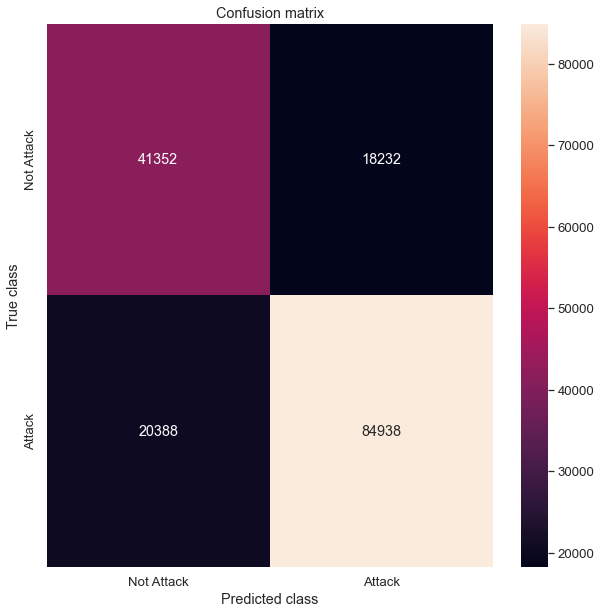

validation dataset



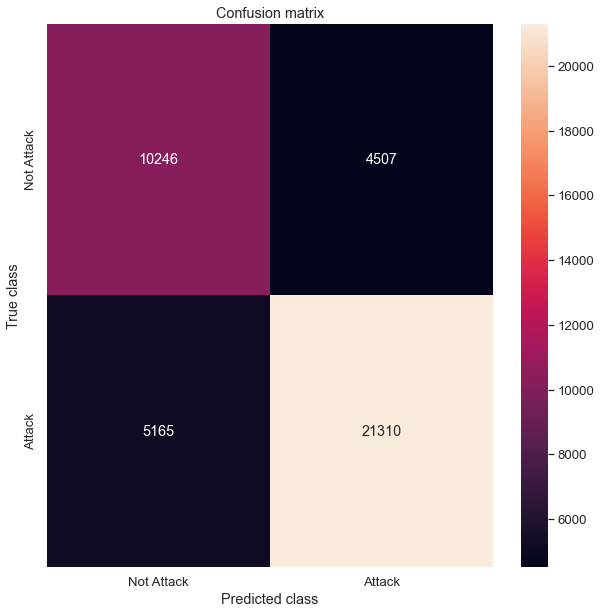

testing dataset



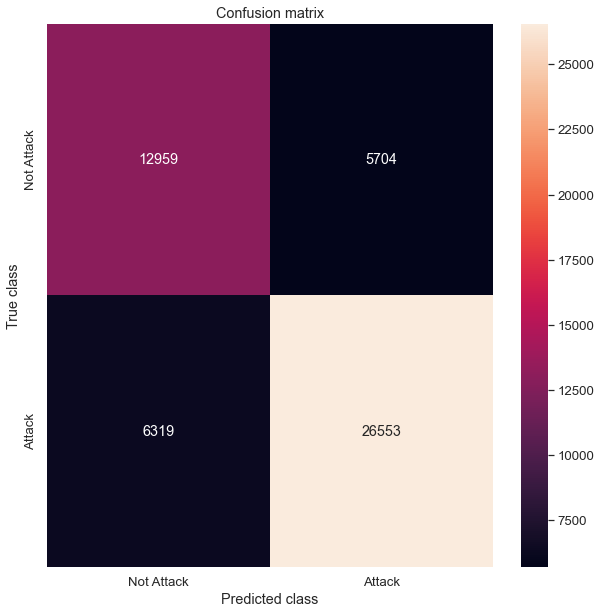

In [54]:
print('training dataset\n')
show_confusion_matrix(tr_df, tr_pred)
print('validation dataset\n')
show_confusion_matrix(val_df, val_pred)
print('testing dataset\n')
show_confusion_matrix(tt_df, tt_pred)